In [ ]:
# https://dune.com/queries/1184289
# https://dune.com/queries/932404
# https://dune.com/queries/83579

In [84]:
from dunebuggy import Dune
dune = Dune()

In [5]:
hold_6hours_250days = dune.fetch_query(2142043)
# hold_6hours_250days.df.to_csv('hold_6hours_250days.csv')

In [6]:
hold_between_6hours_1day_250days = dune.fetch_query(2142043)
# hold_between_6hours_1day_250days.df.to_csv('hold_between_6hours_1day_250days.csv')

In [7]:
hold_between_1day_5days_250days = dune.fetch_query(2142043)
# hold_between_1day_5days_250days.df.to_csv('hold_between_1day_5days_250days.csv')

In [8]:
hold_between_5days_30days_250days = dune.fetch_query(2142043)
# hold_between_5days_30days_250days.df.to_csv('hold_between_5days_30days_250days.csv')

In [9]:
hold_between_1month_1year_250days = dune.fetch_query(2142043)
# hold_between_1month_1year_250days.df.to_csv('hold_between_1month_1year_250days.csv')

In [85]:
bin1 = hold_6hours_250days.df
bin2 = hold_between_6hours_1day_250days.df
bin3 = hold_between_1day_5days_250days.df
bin4 = hold_between_5days_30days_250days.df
bin5 = hold_between_1month_1year_250days.df

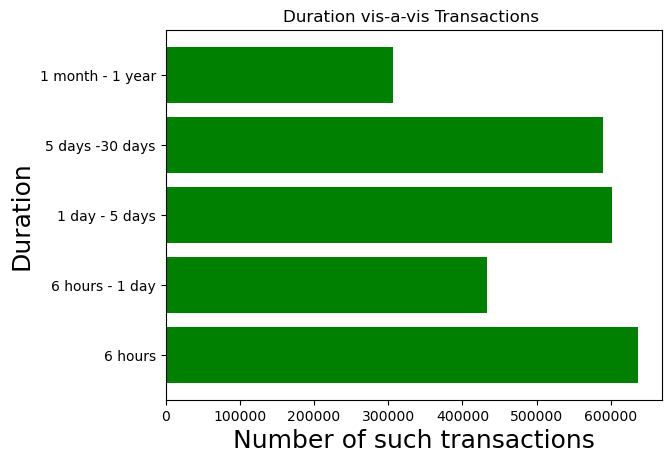

In [86]:
import matplotlib.pyplot as plt

data = {'6 hours': len(bin1), '6 hours - 1 day': len(bin2),'1 day - 5 days': len(bin3),'5 days -30 days': len(bin4),'1 month - 1 year': len(bin5)}
duration = list(data.keys())
values = list(data.values())
plt.barh(range(len(data)), values , tick_label=duration, color=['green'], align='center')
plt.title('Duration vis-a-vis Transactions ')
plt.ylabel('Duration', fontsize=18)
plt.xlabel('Number of such transactions', fontsize=18)
plt.show()

In [87]:
import pandas as pd
combinedbins = pd.concat([bin1, bin2, bin3, bin4, bin5], axis=0)

In [88]:
# buyers = list(combinedbins['buyer'].dropna().unique())
# len(buyers)

buyer_net_dict = {}
for index, row in combinedbins.iterrows():
    if row['buyer'] not in buyer_net_dict:
        buyer_net_dict[row['buyer']] = row['net']
    else:
        count = buyer_net_dict[row['buyer']]
        buyer_net_dict[row['buyer']] = row['net'] + count
        
# len(buyer_net_dict) confirming it is all unique


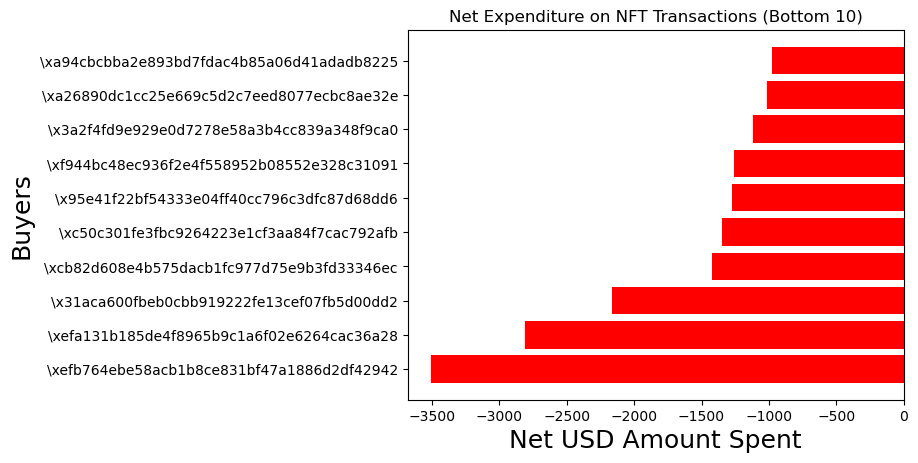

In [89]:
k = 10
result = dict(sorted(buyer_net_dict.items(), key = lambda x: x[1])[:k])

names = list(result.keys())
values = list(result.values())

# plt.bar(range(len(data)), values, tick_label=duration, color=['green'])
plt.barh(range(len(result)), values , tick_label=names, color=['red'], align='center')
plt.title('Cross Platform Activity')
plt.title('Net Expenditure on NFT Transactions (Bottom 10)')
plt.ylabel('Buyers', fontsize=18)
plt.xlabel('Net USD Amount Spent', fontsize=18)
plt.show()

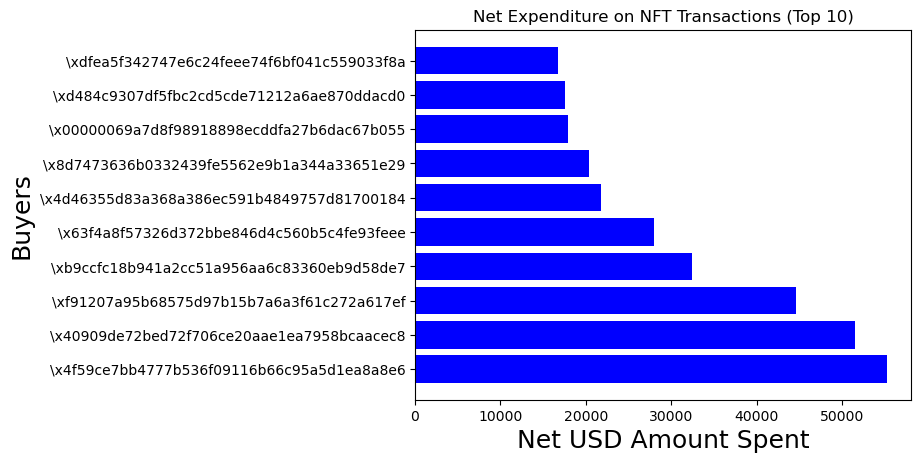

In [90]:
k = 10
result = dict(sorted(buyer_net_dict.items(), key = lambda x: x[1], reverse = True)[:k])

names = list(result.keys())
values = list(result.values())
plt.barh(range(len(result)), values , tick_label=names, color=['blue'], align='center')
plt.title('Net Expenditure on NFT Transactions (Top 10)')
plt.ylabel('Buyers', fontsize=18)
plt.xlabel('Net USD Amount Spent', fontsize=18)
plt.show()

In [91]:
buyer_nft_contract_address_dict = {}
for index, row in combinedbins.iterrows():
    if row['buyer'] not in buyer_nft_contract_address_dict:
        listnew = []
        listnew.append(row['nft_contract_address'])
        buyer_nft_contract_address_dict[row['buyer']] = list(set(listnew))
        listnew.clear()
    else:
        listnftcontracts = []
        listnftcontracts = buyer_nft_contract_address_dict[row['buyer']]
        listnftcontracts.append(row['nft_contract_address'])
        buyer_nft_contract_address_dict[row['buyer']] = list(set(listnftcontracts))
        listnftcontracts.clear()

In [92]:
buyer_nft_contract_address_count_dict = {}
for key, value in buyer_nft_contract_address_dict.items():
    buyer_nft_contract_address_count_dict[key] = len(value)

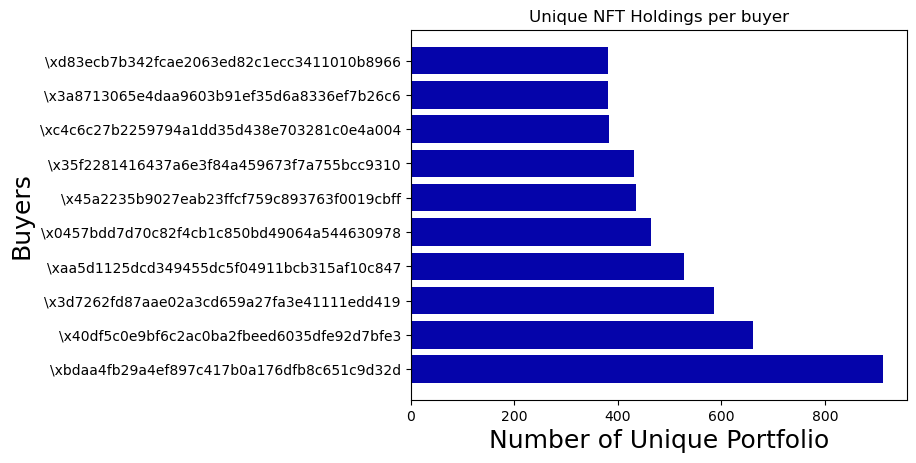

In [96]:
k = 10
result = dict(sorted(buyer_nft_contract_address_count_dict.items(), key = lambda x: x[1], reverse = True)[:k])
names = list(result.keys())
values = list(result.values())
plt.barh(range(len(result)), values , tick_label=names, color='#0504aa', align='center')
plt.title('Unique NFT Holdings per buyer')
plt.ylabel('Buyers', fontsize=18)
plt.xlabel('Number of Unique Portfolio', fontsize=18)
plt.show()

In [54]:
combinedbins.to_csv('combinedbins.csv')

In [94]:
buyer_count_cross_platform = {}
for index, row in combinedbins.iterrows():
    if row['buyer'] not in buyer_count_cross_platform:
        if row['n1platform'] != row['n2platform']:
            buyer_count_cross_platform[row['buyer']] = 1
        else:
            buyer_count_cross_platform[row['buyer']] = 0
    else:
        count = buyer_count_cross_platform[row['buyer']]
        if row['n1platform'] != row['n2platform']: 
            buyer_count_cross_platform[row['buyer']] = count + 1

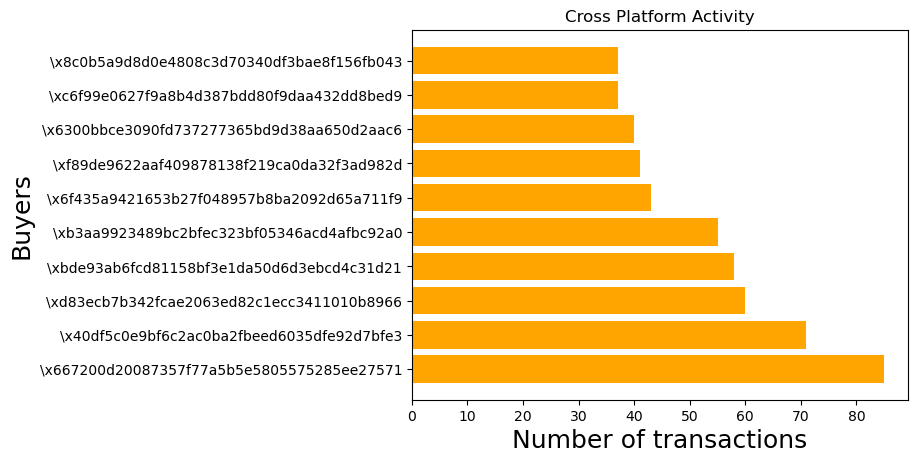

In [95]:
k = 10
result = dict(sorted(buyer_count_cross_platform.items(), key = lambda x: x[1], reverse = True)[:k])
names = list(result.keys())
values = list(result.values())
plt.barh(range(len(result)), values , tick_label=names, color=['orange'], align='center')
plt.title('Cross Platform Activity')
plt.ylabel('Buyers', fontsize=18)
plt.xlabel('Number of transactions', fontsize=18)
plt.show()